# 3 Classification Problem
## Example 1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import set_option

## 3. Understand Data With Descriptive Statistics
### 3.1. Peek at Your Data
Looking at the raw data can reveal insights that you cannot get any other way. It can also plant seeds that may later grow into ideas on how to better pre-process and handle the data for machine learning tasks. 

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 3.2. Dimensions of Your Data
You must have a very good handle on how much data you have, both in terms of rows and columns.
  Too many rows and algorithms may take too long to train. Too few and perhaps you do not have enough data to train the algorithms.
  Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.

In [5]:
df.shape

(768, 9)

### 3.3. Data Type For Each Attribute
The type of each attribute is important. Strings may need to be converted to floating point values or integers to represent categorical or ordinal values. You can get an idea of the types of attributes by peeking at the raw data, as above. You can also list the data types used by the DataFrame to characterize each attribute using the dtypes property.

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### 3.4. Descriptive Statistics
Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute. 

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#set_option('display.width', 100)
#set_option('precision', 3)
description = df.describe()
print(description)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### 3.5. Class Distribution (Classification Only)
On classification problems you need to know how balanced the class values are. Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project. 

In [9]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

### 3.6. Correlations Between Attributes
Correlation refers to the relationship between two variables and how they may or may not change together. The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all. Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset. As such, it is a good idea to review all of the pairwise correlations of the attributes in your dataset. You can use the corr() function on the Pandas DataFrame to calculate a correlation matrix.

In [10]:
#set_option('display.width', 100)
#set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

### 3.7. Skew of Univariate Distributions
Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.

In [11]:
#The skew results show a positive (right) or negative (left) skew. Values closer to zero show less skew.
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

## 4. Understand Data With Visualization
### 4.1. Univariate Plots
In this section we will look at three techniques that you can use to understand each attribute of your dataset independently.
  Histograms.
  Density Plots.
  Box and Whisker Plots.
#### Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

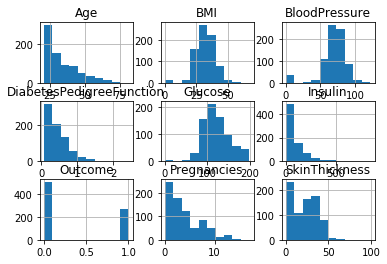

In [12]:
df.hist()
plt.show()

We can see that perhaps the attributes age, pedi and test may have an exponential distribution. We can also see that perhaps the mass and pres and plas attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

#### Density Plots
Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.

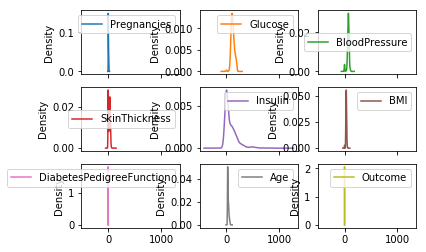

In [13]:
df.plot(kind='density', subplots=True, layout=(3,3)) 
plt.show()
#We can see the distribution for each attribute is clearer than the histograms.

#### Box and Whisker Plots
Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

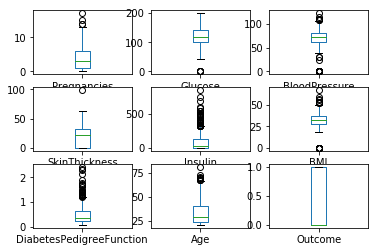

In [14]:
df.plot(kind='box', subplots=True, layout=(3,3)) 
plt.show()
#We can see that the spread of attributes is quite different. 
#Some like age, test and skin appear quite skewed towards smaller values.

### 4.2. Multivariate Plots
This section provides examples of two plots that show the interactions between multiple variables in your dataset.
  Correlation Matrix Plot.   Scatter Plot Matrix.
#### Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated. You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


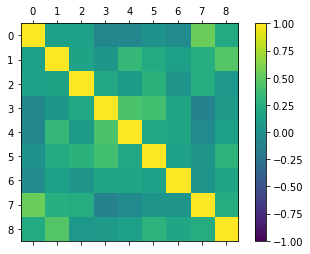

In [16]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

#### Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

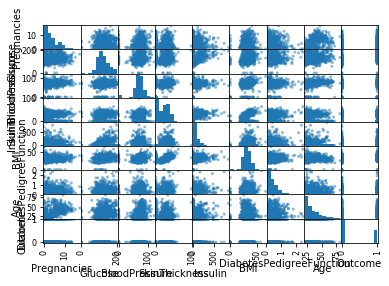

In [17]:
pd.plotting.scatter_matrix(df)
plt.show()
#Like the Correlation Matrix Plot above, the scatter plot matrix is symmetrical. 
#This is useful to look at the pairwise relationships from different perspectives. 

## 5. Prepare Your Data For Machine Learning 

Many machine learning algorithms make assumptions about your data. 
It is often a very good idea to prepare your data in such a way to best expose the structure of the problem to the machine learning algorithms that you intend to use. 
In this section you will discover how to prepare your data for machine learning in Python using scikit-learn. 
After completing this lesson you will know how to: 
Rescale data.
Standardize data. 
Normalize data. 
Binarize data. 

### 5.1. Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale. Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1. This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent. You can rescale your data using scikit-learn using the MinMaxScaler class

In [18]:
from sklearn.preprocessing import MinMaxScaler
array = df.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

In [19]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [20]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [21]:
scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

### 5.2. Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis. You can standardize data using scikit-learn with the StandardScaler class

In [22]:
from sklearn.preprocessing import StandardScaler
array = df.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
rescaledX
#The values for each attribute now have a mean value of 0 and a standard deviation of 1.

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

### 5.3. Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra). This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors. You can normalize data in Python with scikit-learn using the Normalizer class

In [23]:
from sklearn.preprocessing import Normalizer
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
rescaledX = scaler.transform(X)
rescaledX
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

### 5.4. Binarize Data (Make Binary)
You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0. This is called binarizing your data or thresholding your data. It can be useful when you have probabilities that you want to make into crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful. You can create new binary attributes in Python using scikit-learn with the Binarizer class

In [36]:
from sklearn.preprocessing import Binarizer
X = array[:,0:8]
Y = array[:,8]
scaler = Binarizer(threshold=0.0).fit(X)
rescaledX = scaler.transform(X)
rescaledX
#You can see that all values equal or less than 0 are marked 0 and all of those above 0 are marked 1.

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

## 6. Evaluate the Performance of Machine Learning Algorithms with Resampling
### 6.1. Split into Train and Test Sets 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=seed)
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test) 
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 76.190%


### 6.2. K-fold Cross-Validation
<img src="files/kfolds.png">

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.086% (5.091%)


## 7. Machine Learning Algorithm Performance Metrics
### 7.1. Classification Accuracy

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.086% (5.091%)


### 7.2. Confusion Matrix
<img src="files/confusionm.png">

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=seed)
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[130  17]
 [ 38  46]]


### 7.3. Classification Report

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=seed)
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.83       147
         1.0       0.73      0.55      0.63        84

   micro avg       0.76      0.76      0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231



## 8. Machine Learning Algorithm Performance Metrics
Spot-checking is a way of discovering which algorithms perform well on your machine learning problem. You cannot know which algorithms are best suited to your problem beforehand. You must trial a number of methods and focus attention on those that prove themselves the most promising. 

In [30]:
#https://scikit-learn.org/stable/supervised_learning.html
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
#model = LinearDiscriminantAnalysis()
#model = KNeighborsClassifier()
#model = GaussianNB()
#model = DecisionTreeClassifier()
#model = SVC()
#model = RandomForestClassifier(n_estimators=100, max_features=3)
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')  #accuracy
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.086% (5.091%)


## 10. Compare Machine Learning Algorithms
It is important to compare the performance of multiple different machine learning algorithms consistently. In this chapter you will discover how you can create a test harness to compare multiple different machine learning algorithms in Python with scikit-learn. You can use this test harness as a template on your own machine learning problems and add more and different algorithms to compare. 

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.695455 (0.052322)
NB: 0.759142 (0.038960)


/Users/Apple/anaconda3/envs/dlwp/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Apple/anaconda3/envs/dlwp/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Apple/anaconda3/envs/dlwp/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Apple/anaconda3/en

SVM: 0.651145 (0.059888)


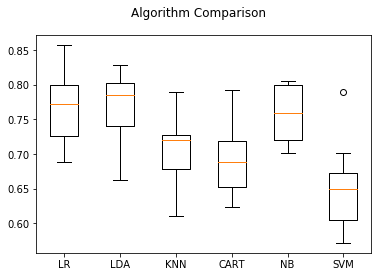

In [31]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

## 11. Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data

In [32]:
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = LogisticRegression(solver='liblinear')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(gamma='auto')
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7448906356801094


## 12. Improve Performance with Algorithm Tuning
Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. 
### Grid Search Parameter Tuning
Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = RidgeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.7708333333333334
1.0


## 13. Model Finalization
### Save and Load Machine Learning Models

In [34]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb')) 
result = loaded_model.score(X_test, Y_test) 
print(result)

0.7559055118110236
